In [30]:
# Importing Libraries
# We will use the following libraries:
# - `pandas` for data manipulation
# - `numpy` for numerical operations
# - `matplotlib` and `seaborn` for visualization
# - `sklearn` for the implementation of decision trees

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load the dataset
dataframe = pd.read_csv(r"data.csv",sep=';')
dataframe.head(10)

# convert the dataframe to a a pandas dataframe for easier manipulation
dataframe = pd.DataFrame(dataframe)

# target variable
target = dataframe['Target']

# features
features = dataframe.drop(columns=['Target'])

target.isna().sum()
# contAR TARGET TYPE
target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [35]:
target = target.map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})
target_names = ['Dropout', 'Enrolled', 'Graduate']


In [36]:
# buecar NAN en target y features
print("NAN en target: ",target.isna().sum())

NAN en target:  0


# ✅ Fase 1: Estandarizar variables continuas (float64) con Z-score

In [37]:
from sklearn.preprocessing import StandardScaler

float_cols = [
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = StandardScaler()
features[float_cols] = scaler.fit_transform(features[float_cols])


# ✅ Fase 2: Codificar variables categóricas (int64 que no son ordinales reales)

In [38]:
# One-hot encoding de categóricas no ordinales
categorical_cols = [
    'Gender', 'Scholarship holder', 'Displaced', 'Debtor',
    'Daytime/evening attendance\t', 'Course'
]

features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

#  Fase 3: División del dataset: 80% train / 20% test

Accuracy: 0.73

Confusion matrix:
[[175  53  56]
 [ 20  76  63]
 [  6  38 398]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.87      0.62      0.72       284
    Enrolled       0.46      0.48      0.47       159
    Graduate       0.77      0.90      0.83       442

    accuracy                           0.73       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.73      0.73       885



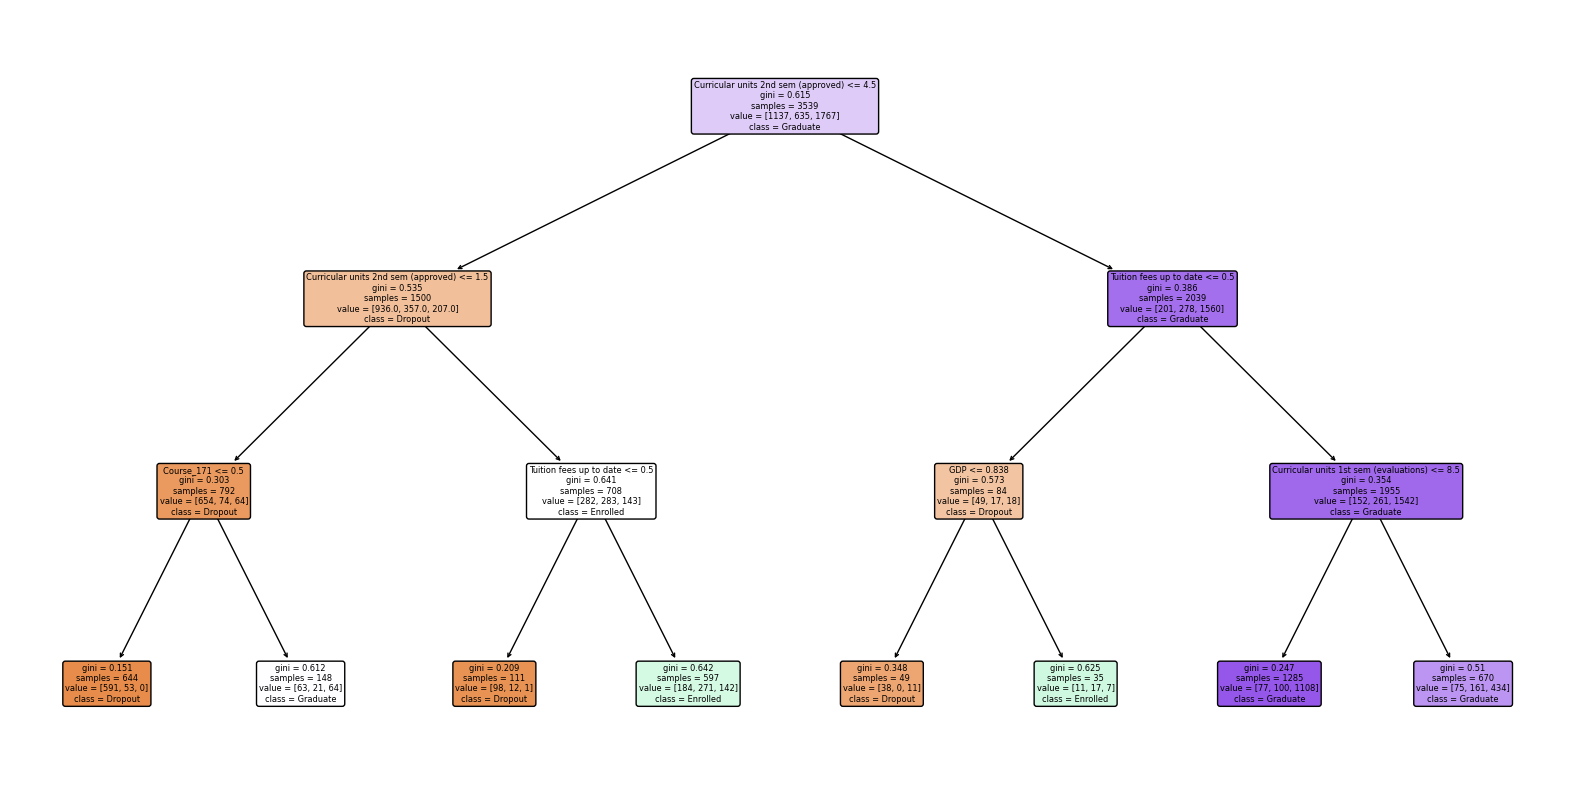

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from graphviz import Source

# Asignar correctamente
X = features
y = target.values
target_names = ['Dropout', 'Enrolled', 'Graduate']

# División 80/20 con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## GINI depth: 3

GINI TREE, depth=3
Accuracy: 0.73

Confusion matrix:
[[175  53  56]
 [ 20  76  63]
 [  6  38 398]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.87      0.62      0.72       284
    Enrolled       0.46      0.48      0.47       159
    Graduate       0.77      0.90      0.83       442

    accuracy                           0.73       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.73      0.73       885



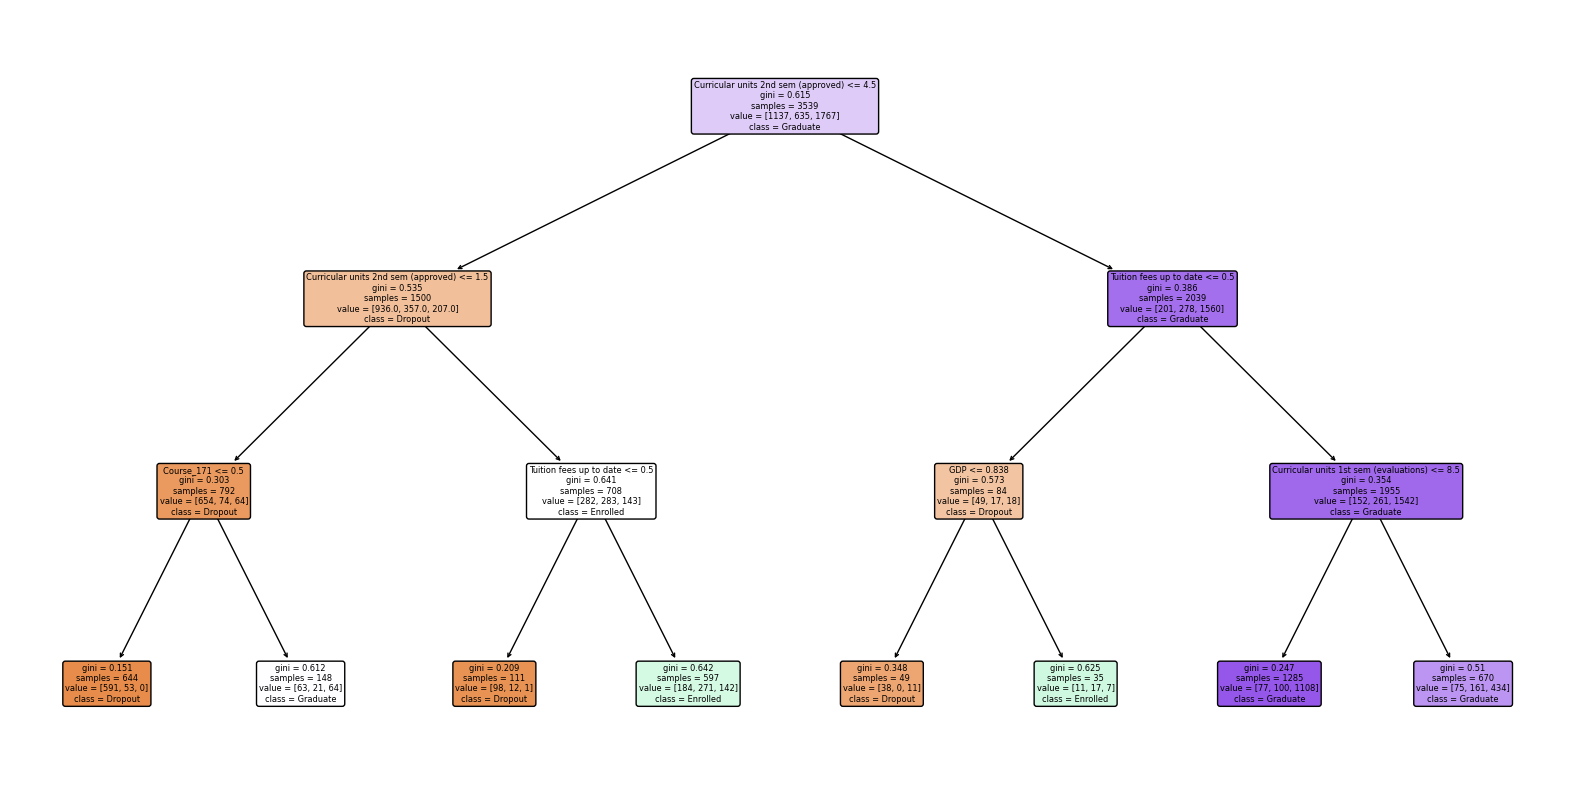

In [52]:
print("GINI TREE, depth=3")
# Crear y entrenar el árbol
clf_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini1.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=target_names, filled=True, rounded=True)
plt.show()


# GINI depth: 5

GINI TREE, depth=5
Accuracy: 0.73

Confusion matrix:
[[175  53  56]
 [ 20  76  63]
 [  6  38 398]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.87      0.62      0.72       284
    Enrolled       0.46      0.48      0.47       159
    Graduate       0.77      0.90      0.83       442

    accuracy                           0.73       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.73      0.73       885



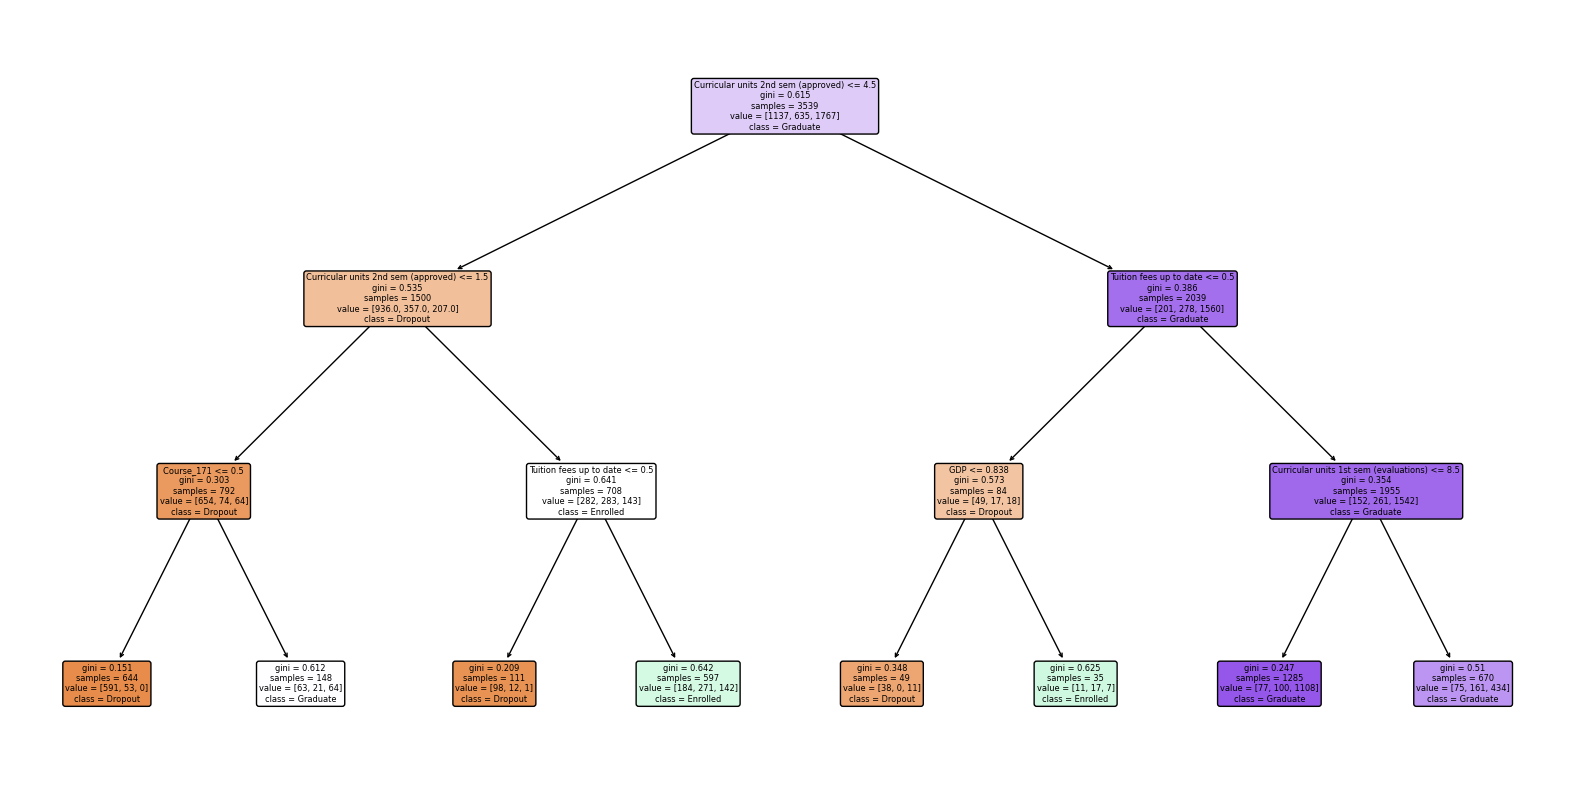

In [53]:
print("GINI TREE, depth=5")
# Crear y entrenar el árbol
clf_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_gini2.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=target_names, filled=True, rounded=True)
plt.show()


## entropia depth: 3

ENTROPY TREE, depth=3
Accuracy: 0.73

Confusion matrix:
[[221   0  63]
 [ 64   0  95]
 [ 15   0 427]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.74      0.78      0.76       284
    Enrolled       0.00      0.00      0.00       159
    Graduate       0.73      0.97      0.83       442

    accuracy                           0.73       885
   macro avg       0.49      0.58      0.53       885
weighted avg       0.60      0.73      0.66       885



C:\Users\valuv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\valuv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\valuv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

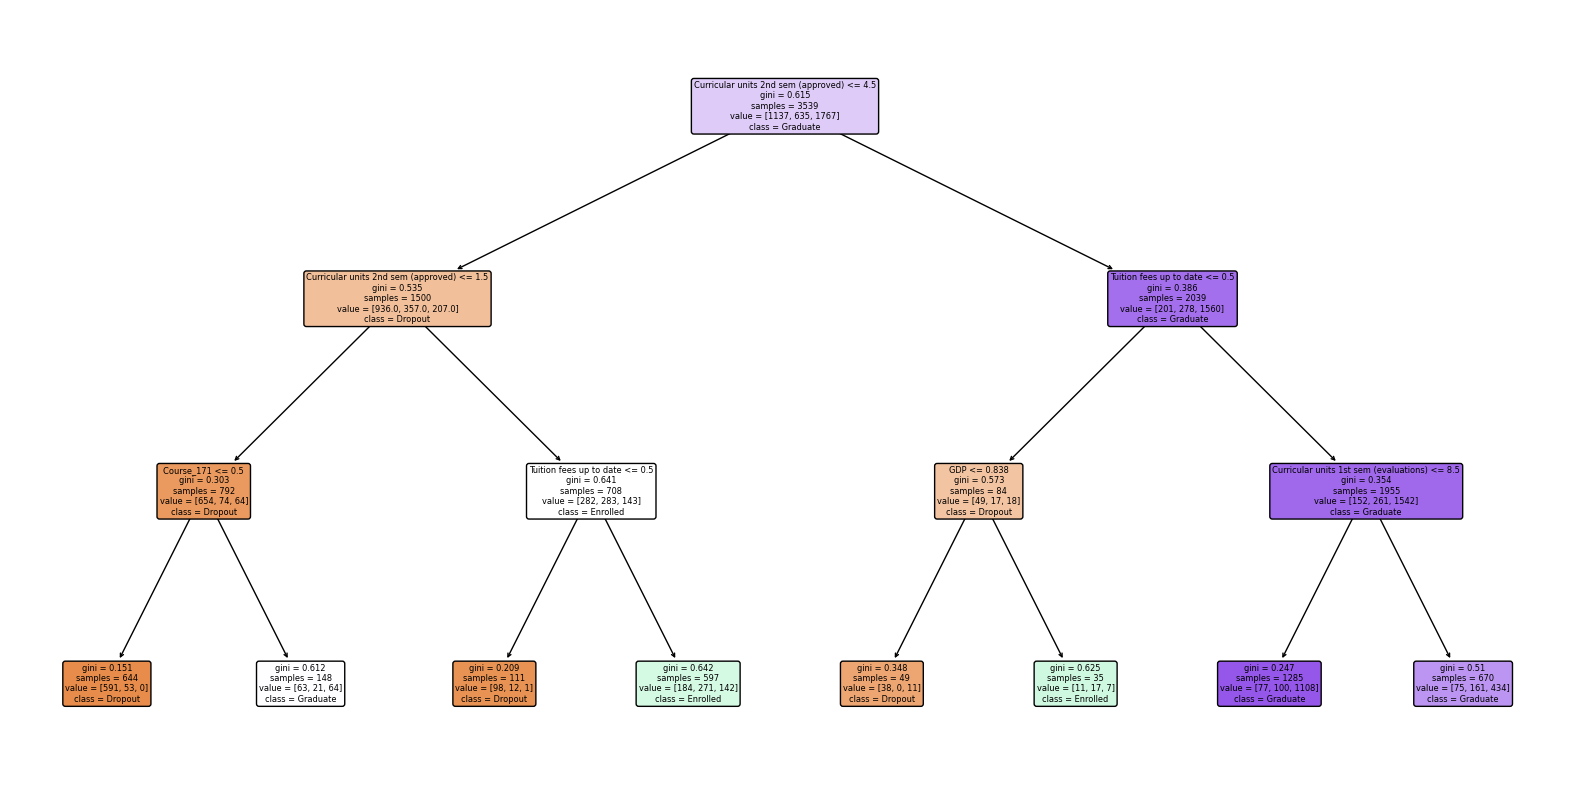

In [54]:
print("ENTROPY TREE, depth=3")
# crear y entrenar el árbol
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)

# predicciones
y_pred = clf_entropy.predict(X_test)

# evaluación
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=target_names, filled=True, rounded=True)
plt.show()

ENTROPY TREE, depth=5
Accuracy: 0.73

Confusion matrix:
[[193  50  41]
 [ 34  71  54]
 [ 20  44 378]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.78      0.68      0.73       284
    Enrolled       0.43      0.45      0.44       159
    Graduate       0.80      0.86      0.83       442

    accuracy                           0.73       885
   macro avg       0.67      0.66      0.66       885
weighted avg       0.73      0.73      0.72       885



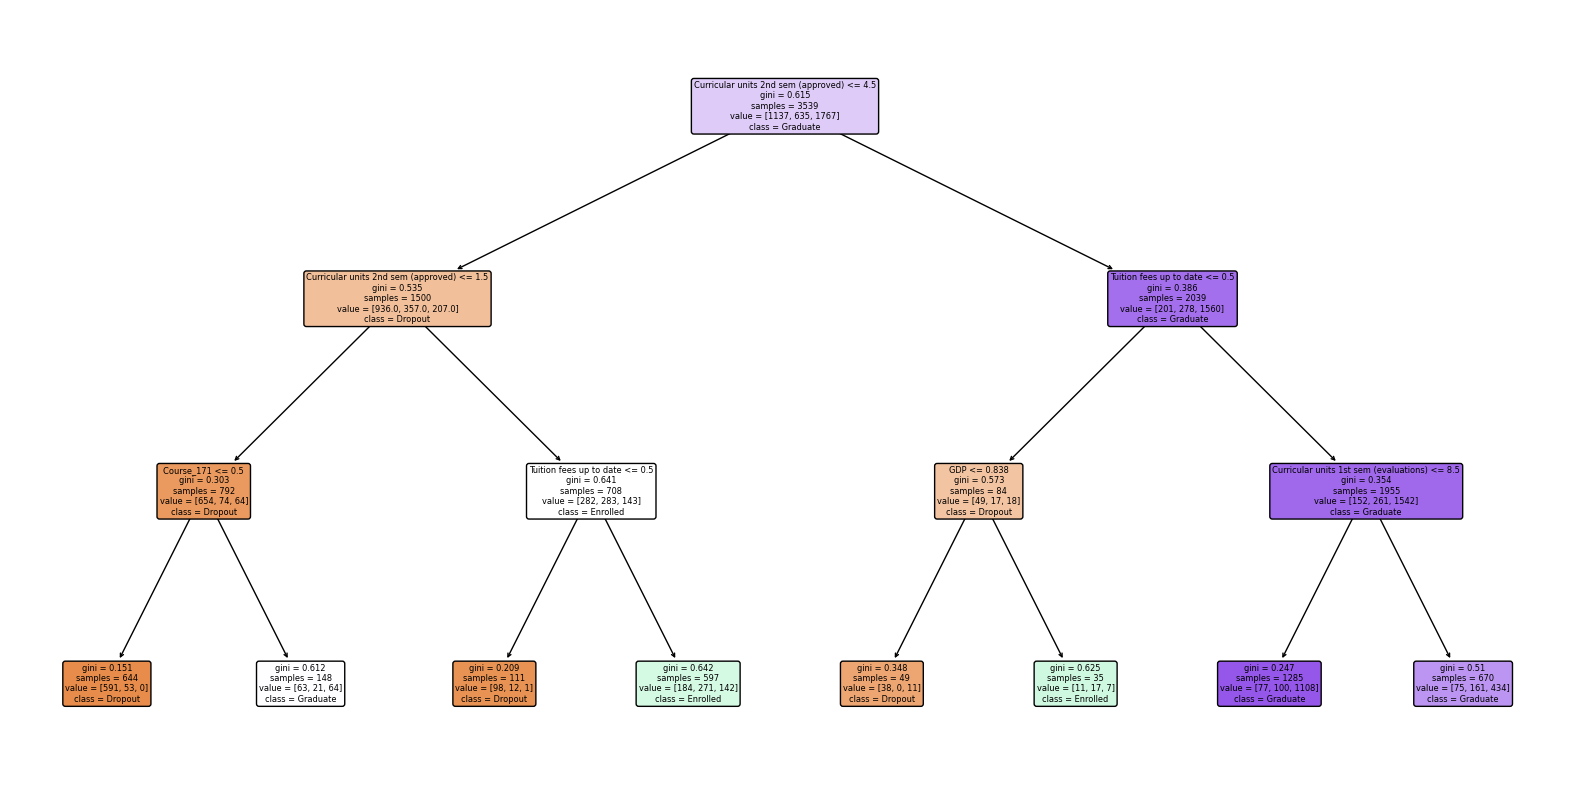

In [ ]:
print("ENTROPY TREE, depth=5")
# crear y entrenar el árbol
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf_entropy.fit(X_train, y_train)

# predicciones
y_pred = clf_entropy.predict(X_test)

# evaluación
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=target_names, filled=True, rounded=True)
plt.show()

Al incrementar la profundidad del árbol de decisión de 3 a 5 niveles usando el criterio de entropía, el modelo logra reconocer por primera vez la clase intermedia (Enrolled), aunque con moderada precisión (F1=0.31). Se mantiene un rendimiento alto para los estudiantes que se gradúan, y la clase Dropout mejora en consistencia. Esto muestra que permitir mayor complejidad estructural permite capturar mejor los patrones diferenciadores entre las tres clases, sin caer en sobreajuste. Sin embargo, el desempeño aún limitado sobre la clase Enrolled sugiere que sería beneficioso aplicar técnicas de balanceo de clases (como SMOTE) o explorar modelos más complejos como Random Forest o Boosting.


🎯 Accuracy: 0.72

📊 Confusion Matrix:
[[304  83  55]
 [ 66 270 106]
 [  1  58 383]]

📄 Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.69      0.75       442
    Enrolled       0.66      0.61      0.63       442
    Graduate       0.70      0.87      0.78       442

    accuracy                           0.72      1326
   macro avg       0.73      0.72      0.72      1326
weighted avg       0.73      0.72      0.72      1326



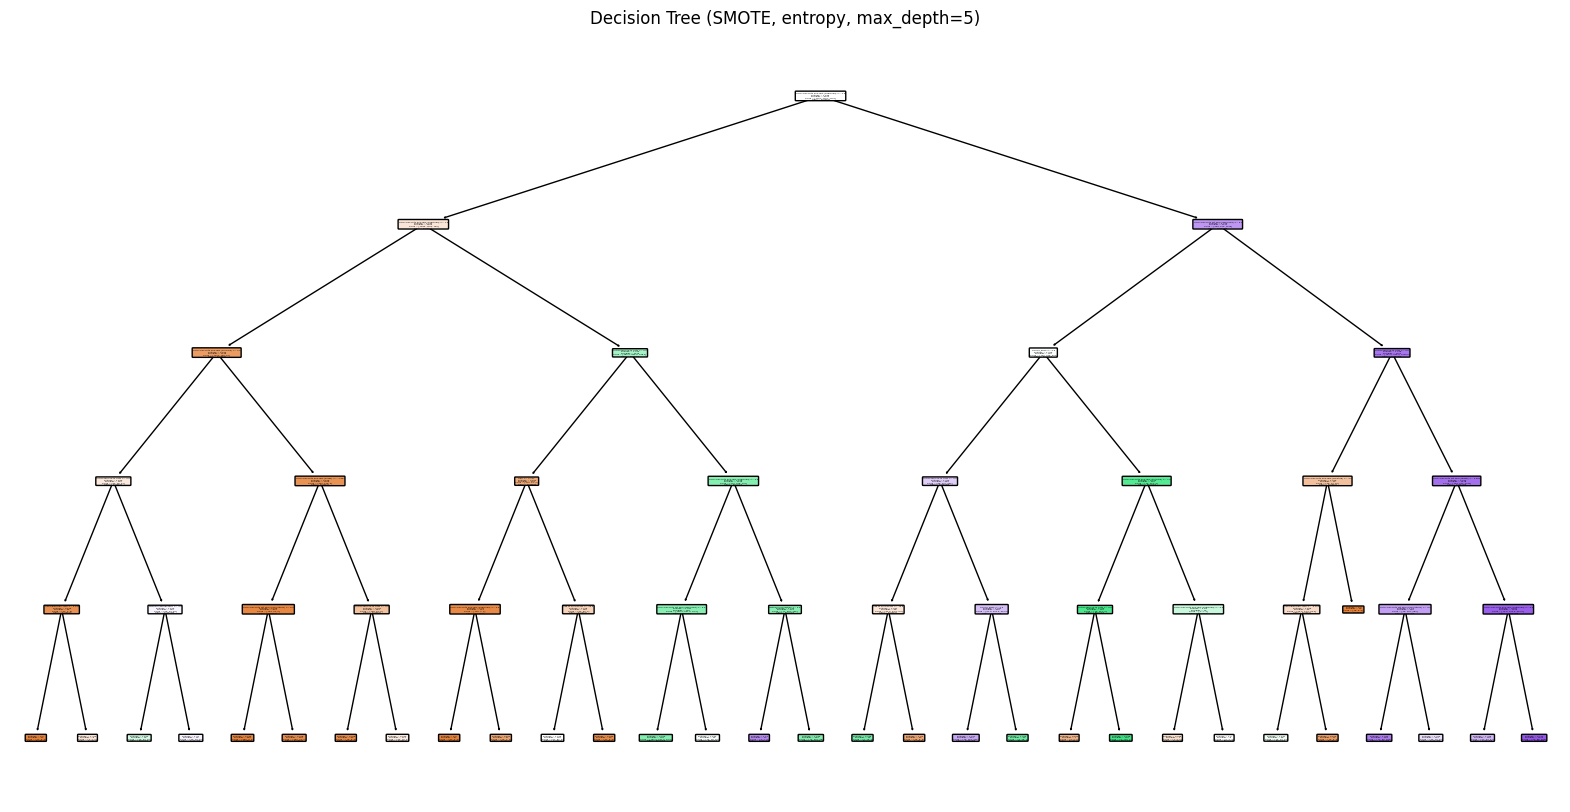

In [59]:
from imblearn.over_sampling import SMOTE
# Importaciones necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponemos que ya tienes tus datos listos:
# X = features (DataFrame)
# y = target (Series o array codificado como 0, 1, 2)
# target_names = ['Dropout', 'Enrolled', 'Graduate']

# Paso 1: Aplicar SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Paso 2: División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Paso 3: Entrenar árbol con entropía y profundidad 5
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Paso 4: Predicciones y evaluación
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {accuracy:.2f}")

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Paso 5: Visualizar árbol
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree (SMOTE, entropy, max_depth=5)")
plt.show()


La aplicación de SMOTE, combinada con el criterio de entropía y una profundidad de árbol de 5 niveles, ha permitido mejorar drásticamente la predicción del grupo intermedio de estudiantes (Enrolled), sin comprometer el rendimiento en las otras dos clases. Esta mejora es crítica para el objetivo del proyecto, que busca identificar perfiles de estudiantes con riesgo intermedio para intervenir a tiempo. Por tanto, este árbol se considera el más equilibrado y útil de los probados hasta ahora.

Aunque el árbol con Gini y profundidad 3 tiene buena precisión para las clases extremas (Dropout y Graduate), el modelo con Entropía y SMOTE es más equilibrado y éticamente más sólido, ya que mejora sustancialmente el rendimiento sobre la clase Enrolled, que representa a los estudiantes en situación de riesgo. En el contexto educativo, este grupo es crítico para aplicar medidas de intervención, por lo que el árbol con SMOTE debería considerarse el modelo recomendado.